In [1]:
from ipymarkup import show_dep_ascii_markup, show_dep_markup, show_span_box_markup
from ipymarkup.palette import palette, BLUE, RED, GREEN
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Syntax
from yargy import Parser

In [2]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import yake
from laserembeddings import Laser

In [3]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar')
syntax = Syntax.load('slovnet_syntax_news_v1.tar')
syntax.navec(navec)

Syntax(
    infer=SyntaxInfer(
        model=Syntax(
            emb=WordShapeEmbedding(
                word=NavecEmbedding(
                    id='news_v1_1B_250K_300d_100q',
                    indexes=Weight(
                        shape=[250002,
                         100],
                        dtype='uint8',
                        array=array([[176, 222, 248, ..., 244, 183, 191],
                               [215, 200, 168, ..., 120, 217,  21],
                               [ 83, 174,  54, ..., 106,  88, 251],
                               ...,
                               [133, 125, 123, ..., 124,  94,  24],
                               [183,  49, 180, ..., 151, 167,  68],
                               [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
                    ),
                    codes=Weight(
                        shape=[100,
                         256,
                         3],
                        dtype='float32',
                    

In [4]:
!python -m dostoevsky download fasttext-social-network-model

In [5]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [60]:
language = "ru"
max_ngram_size = 5
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 5
numOfKeywords = 20

In [61]:
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)

In [8]:
!python -m laserembeddings download-models


✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fcodes    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/93langs.fvocab    
✅   Downloaded https://dl.fbaipublicfiles.com/laser/models/bilstm.93langs.2018-12-26.pt    

✨ You're all set!


In [8]:
laser = Laser()

In [9]:
#text = "За последние 10 лет, во втором десятилетии XXI века, рынок стартапов и венчурного инвестирования для многих незаметно, но кардинально изменился. Парадигмой пионеров интернета было создать проект, который изменит интернет к лучшему — «сделать новый Google» (новый Facebook, новый YouTube, новый айфон и так далее). Новой парадигмой стартапера, задумывающегося о своём вкладе в интернет, вступившей в силу в последнее десятилетие, стало создать проект, который будет куплен «Гуглом», «Фейсбуком», Apple (или «Яндексом» или Mail.ru в случае Рунета). Об изменении мира или хотя бы интернета речи уже не идёт — мир уже изменился, а в процессе был открыт, изучен и поделён. Все точки входа и торговые пути под контролем выросших за первые два десятилетия XXI века империй, и новоприбывающим колонистам ничего не остаётся, кроме как выбирать, флагу какой из них присягнуть. Для многих людей, включая автора этих строк, заставших нынешние интернет-империи «в коротких штанишках», когда мы дышали с ними одним воздухом интернет-вольницы, а «Гугл» ещё верил в свой девиз Don't be evil, произошедшее преображение оказалось неприятным, болезненным и неожиданным поворотом. И — отрезвляющим. Но, на самом деле, за последние 10 лет не произошло совершенно ничего нового."
#text = "Минтранс предложил оснастить автомобили сервисов такси устройствами для контроля сонливости водителей. Об этом говорится в проекте федерального закона «О такси», размещённого на сайте проектов нормативно-правовых актов. Законопроект предусматривает, чтобы кузов такси окрашивали по схеме из квадратов контрастных цветов в шахматном порядке. При этом цветовая гамма должна «соответствовать стандартам региона». На крыше автомобиля необходимо размещать опознавательный фонарь оранжевого цвета. Если проект примут, он вступит в силу 1 сентября 2022 года. Действующие ПДД разрешают водителю находиться за рулём суммарно не более десяти часов. Контролируют это с помощью тахографов. Штраф для нарушителей — до 2,5 тысяч рублей."
text = 'В Москве представили концепт нового пассажирского вагона "Ёлочка". Свое название проект получил из-за особого размещения спальных мест: индивидуальные купе-капсулы располагаются в два яруса под углом и на плане образуют структуру в виде «елочки». Такая компоновка позволяет включить в вагон большое количество мест: от 52-х до 58-ми в зависимости от объема сервисных зон. Спальное место в вагоне — это индивидуальное купе-капсула, отделенное стенкой и шторкой от общего коридора. Пассажиры и верхней, и нижней полки получают собственные удлиненное спальное место, окно, столик и место для багажа.'

In [10]:
chunk = []
sentences = []
for sent in sentenize(text):
    sentence = {}
    sentence['text'] = sent.text
    sentence['span'] = (sent.start, sent.stop)
    sentences.append(sentence)
    tokens = [_.text for _ in tokenize(sent.text)]
    chunk.append(tokens)
chunk[:1]

[['В',
  'Москве',
  'представили',
  'концепт',
  'нового',
  'пассажирского',
  'вагона',
  '"',
  'Ёлочка',
  '"',
  '.']]

In [14]:
chunk

[['В',
  'Москве',
  'представили',
  'концепт',
  'нового',
  'пассажирского',
  'вагона',
  '"',
  'Ёлочка',
  '"',
  '.'],
 ['Свое',
  'название',
  'проект',
  'получил',
  'из-за',
  'особого',
  'размещения',
  'спальных',
  'мест',
  ':',
  'индивидуальные',
  'купе-капсулы',
  'располагаются',
  'в',
  'два',
  'яруса',
  'под',
  'углом',
  'и',
  'на',
  'плане',
  'образуют',
  'структуру',
  'в',
  'виде',
  '«',
  'елочки',
  '»',
  '.'],
 ['Такая',
  'компоновка',
  'позволяет',
  'включить',
  'в',
  'вагон',
  'большое',
  'количество',
  'мест',
  ':',
  'от',
  '52-х',
  'до',
  '58-ми',
  'в',
  'зависимости',
  'от',
  'объема',
  'сервисных',
  'зон',
  '.'],
 ['Спальное',
  'место',
  'в',
  'вагоне',
  '—',
  'это',
  'индивидуальное',
  'купе-капсула',
  ',',
  'отделенное',
  'стенкой',
  'и',
  'шторкой',
  'от',
  'общего',
  'коридора',
  '.'],
 ['Пассажиры',
  'и',
  'верхней',
  ',',
  'и',
  'нижней',
  'полки',
  'получают',
  'собственные',
  'удлиненно

In [11]:
markup = next(syntax.map(chunk))

In [12]:
# Convert CoNLL-style format to source, target indices
words, deps = [], []
for token in markup.tokens:
    words.append(token.text)
    source = int(token.head_id) - 1
    target = int(token.id) - 1
    if source > 0 and source != target:  # skip root, loops
        deps.append([source, target, token.rel])
show_dep_ascii_markup(words, deps)

      ┌► В             case
    ┌►└─ Москве        obl
┌───└─┌─ представили   
│ ┌───└► концепт       obj
│ │ ┌──► нового        amod
│ │ │ ┌► пассажирского amod
│ └►└─└─ вагона        nmod
│ │   ┌► "             punct
│ └►┌─└─ Ёлочка        appos
│   └──► "             punct
└──────► .             punct


In [13]:
show_dep_markup(words, deps)

In [15]:
sentences

[{'text': 'В Москве представили концепт нового пассажирского вагона "Ёлочка".',
  'span': (0, 66)},
 {'text': 'Свое название проект получил из-за особого размещения спальных мест: индивидуальные купе-капсулы располагаются в два яруса под углом и на плане образуют структуру в виде «елочки».',
  'span': (67, 246)},
 {'text': 'Такая компоновка позволяет включить в вагон большое количество мест: от 52-х до 58-ми в зависимости от объема сервисных зон.',
  'span': (247, 371)},
 {'text': 'Спальное место в вагоне — это индивидуальное купе-капсула, отделенное стенкой и шторкой от общего коридора.',
  'span': (372, 479)},
 {'text': 'Пассажиры и верхней, и нижней полки получают собственные удлиненное спальное место, окно, столик и место для багажа.',
  'span': (480, 596)}]

In [16]:
df_texts = pd.DataFrame(sentences)

In [17]:
df_texts

,text,span
0,В Москве представили концепт нового пассажирск...,"(0, 66)"
1,Свое название проект получил из-за особого раз...,"(67, 246)"
2,Такая компоновка позволяет включить в вагон бо...,"(247, 371)"
3,Спальное место в вагоне — это индивидуальное к...,"(372, 479)"
4,"Пассажиры и верхней, и нижней полки получают с...","(480, 596)"


In [18]:
sent_texts = list(df_texts['text'])

In [19]:
sent_texts

['В Москве представили концепт нового пассажирского вагона "Ёлочка".',
 'Свое название проект получил из-за особого размещения спальных мест: индивидуальные купе-капсулы располагаются в два яруса под углом и на плане образуют структуру в виде «елочки».',
 'Такая компоновка позволяет включить в вагон большое количество мест: от 52-х до 58-ми в зависимости от объема сервисных зон.',
 'Спальное место в вагоне — это индивидуальное купе-капсула, отделенное стенкой и шторкой от общего коридора.',
 'Пассажиры и верхней, и нижней полки получают собственные удлиненное спальное место, окно, столик и место для багажа.']

In [20]:
results = model.predict(sent_texts)

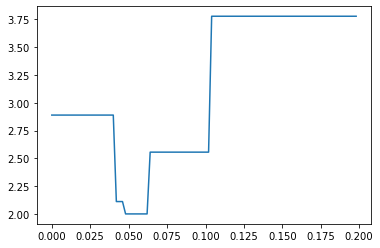

In [23]:
x = []
y = []
n = 100
for i in range(n):
    delta = (0.2/n)*i

    pos_c = 0
    neu_c = 0
    neg_c = 0

    spans = []
    for sentence, sentiment in zip(sentences, results):
        main_sentiment = ''
        if sentiment['negative'] > sentiment['positive']:
            main_sentiment = 'Negative'
            neg_c += 1
        if sentiment['positive'] > sentiment['negative']:
            main_sentiment = 'Positive'
            pos_c += 1
        if abs(sentiment['positive'] - sentiment['negative']) < delta:
            main_sentiment = 'Neutral'
            neu_c += 1
        if main_sentiment != '':
            spans.append(sentence['span'] + (main_sentiment,))
    mean_c = len(spans)
    error = mse([pos_c, neu_c, neg_c], [mean_c/3, mean_c/3, mean_c/3])
    x.append(delta)
    y.append(error)

plt.plot(x, y)

In [25]:
delta = 0.05

pos_c = 0
neu_c = 0
neg_c = 0

spans = []
for sentence, sentiment in zip(sentences, results):
    print(sentence['text'], '\n', sentiment, '\n')
    main_sentiment = ''
    if sentiment['negative'] > sentiment['positive']:
        main_sentiment = 'Negative'
        neg_c += 1
    if sentiment['positive'] > sentiment['negative']:
        main_sentiment = 'Positive'
        pos_c += 1
    if abs(sentiment['positive'] - sentiment['negative']) < delta:
        main_sentiment = 'Neutral'
        neu_c += 1
    if main_sentiment != '':
        spans.append(sentence['span'] + (main_sentiment,))
mean_c = len(spans)
error = mse([pos_c, neu_c, neg_c], [mean_c/3, mean_c/3, mean_c/3])

В Москве представили концепт нового пассажирского вагона "Ёлочка". 
 {'neutral': 0.2689514458179474, 'negative': 0.14415885508060455, 'skip': 0.11921291798353195, 'positive': 0.10375863313674927, 'speech': 0.016924913972616196} 

Свое название проект получил из-за особого размещения спальных мест: индивидуальные купе-капсулы располагаются в два яруса под углом и на плане образуют структуру в виде «елочки». 
 {'neutral': 0.8267217874526978, 'skip': 0.09535945951938629, 'negative': 0.08036746829748154, 'positive': 0.03309597820043564, 'speech': 0.0027249858248978853} 

Такая компоновка позволяет включить в вагон большое количество мест: от 52-х до 58-ми в зависимости от объема сервисных зон. 
 {'neutral': 0.44553956389427185, 'negative': 0.1824355274438858, 'skip': 0.1259327530860901, 'positive': 0.08036746829748154, 'speech': 0.010996942408382893} 

Спальное место в вагоне — это индивидуальное купе-капсула, отделенное стенкой и шторкой от общего коридора. 
 {'neutral': 0.287777841091156

In [26]:
print(delta, error)

0.05 1.9999999999999993


In [27]:
spans

[(0, 66, 'Neutral'),
 (67, 246, 'Neutral'),
 (247, 371, 'Negative'),
 (372, 479, 'Negative'),
 (480, 596, 'Positive')]

In [28]:
show_span_box_markup(text, spans, palette=palette(RED, GREEN, BLUE))

In [29]:
embeddings = laser.embed_sentences(sent_texts, lang='ru')

In [30]:
print(embeddings)

[[ 1.1390889e-02  5.1809419e-03  6.0774648e-04 ...  2.5277371e-02
  -4.3992586e-03  2.4656730e-02]
 [ 4.5958418e-02 -3.8480039e-06 -4.6090143e-05 ...  8.1213014e-03
   7.8396183e-03  3.9087702e-02]
 [ 1.7204515e-03  1.8092218e-05 -1.1228498e-03 ...  3.6319494e-03
  -2.4982239e-03  3.8530219e-02]
 [ 4.0517133e-02 -1.2743221e-05  2.6476656e-03 ...  8.1383986e-03
   1.4402017e-02  2.2042986e-02]
 [ 7.0963302e-03  2.3111705e-05  2.2951049e-04 ... -6.4554700e-04
   1.4980295e-02  1.6069982e-02]]


In [31]:
pca = PCA(n_components=2)

In [32]:
principalComponents = pca.fit_transform(embeddings)

In [33]:
df = pd.DataFrame(principalComponents, columns=['c1', 'c2'])

In [34]:
df

,c1,c2
0,-0.018209,0.378279
1,0.021356,-0.083032
2,0.352181,-0.095984
3,-0.084297,-0.061809
4,-0.271031,-0.137455


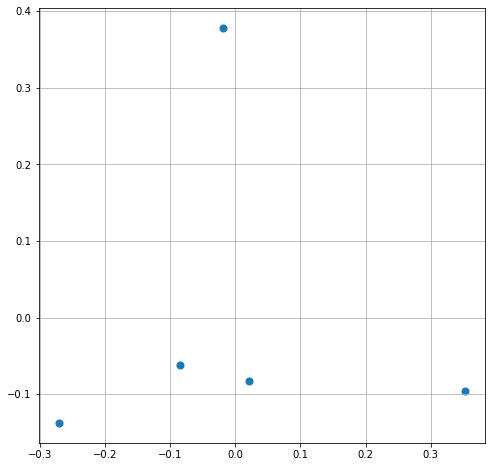

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(df['c1'], df['c2'], s = 50)
ax.grid()

In [36]:
df1 = pd.DataFrame(spans, columns=['start', 'stop', 'sentiment'])
df1

,start,stop,sentiment
0,0,66,Neutral
1,67,246,Neutral
2,247,371,Negative
3,372,479,Negative
4,480,596,Positive


In [37]:
df_texts1 = df_texts.join(df)

In [38]:
df_texts2 = df_texts1.join(df1)

In [39]:
df_texts2

,text,span,c1,c2,start,stop,sentiment
0,В Москве представили концепт нового пассажирск...,"(0, 66)",-0.018209,0.378279,0,66,Neutral
1,Свое название проект получил из-за особого раз...,"(67, 246)",0.021356,-0.083032,67,246,Neutral
2,Такая компоновка позволяет включить в вагон бо...,"(247, 371)",0.352181,-0.095984,247,371,Negative
3,Спальное место в вагоне — это индивидуальное к...,"(372, 479)",-0.084297,-0.061809,372,479,Negative
4,"Пассажиры и верхней, и нижней полки получают с...","(480, 596)",-0.271031,-0.137455,480,596,Positive


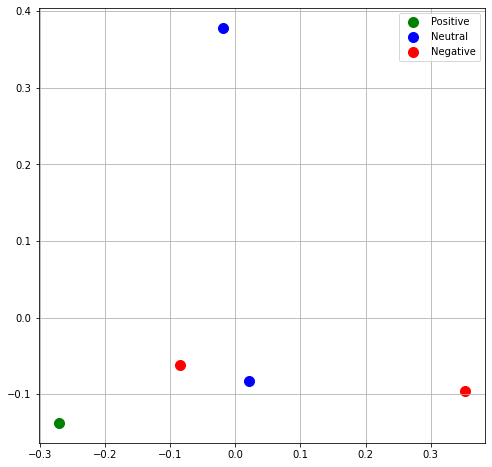

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Positive', 'Neutral', 'Negative']
colors = ['g', 'b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = df_texts2['sentiment'] == target
    ax.scatter(df_texts2.loc[indicesToKeep, 'c1']
               , df_texts2.loc[indicesToKeep, 'c2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

In [41]:
pca.explained_variance_ratio_

array([0.3300913 , 0.29237586], dtype=float32)

In [62]:
keywords = kw_extractor.extract_keywords(text)
keywords.sort(key = lambda t: t[1])

kws = []
for kw in keywords :
    print(kw)
    kws.append(kw[0])

('Москве представили концепт нового пассажирского', 4.474058311281531e-05)
('представили концепт нового пассажирского вагона', 8.093017258907106e-05)
('Москве представили концепт нового', 0.00027409553149279224)
('концепт нового пассажирского вагона', 0.0004938799633358642)
('представили концепт нового пассажирского', 0.0006291675624371368)
('Москве представили концепт', 0.001700586350949192)
('нового пассажирского вагона', 0.0030493777774135648)
('представили концепт нового', 0.0038731499408624806)
('концепт нового пассажирского', 0.0038731499408624806)
('Москве представили', 0.01072210227365529)
('из-за особого размещения спальных мест', 0.015896393698087076)
('пассажирского вагона', 0.01910695083035155)
('название проект получил из-за особого', 0.023992029433023233)
('проект получил из-за особого размещения', 0.023992029433023233)
('получил из-за особого размещения спальных', 0.023992029433023233)
('представили концепт', 0.024177032667904788)
('концепт нового', 0.024177032667904788)

In [63]:
results_kw = model.predict(kws)
results_kw

[{'neutral': 0.287777841091156,
  'negative': 0.16452647745609283,
  'positive': 0.09535945951938629,
  'skip': 0.056662432849407196,
  'speech': 0.01641303114593029},
 {'positive': 0.1520422399044037,
  'negative': 0.14805719256401062,
  'neutral': 0.1259327530860901,
  'skip': 0.07370626926422119,
  'speech': 0.03623005375266075},
 {'neutral': 0.23371636867523193,
  'positive': 0.1294127255678177,
  'negative': 0.09535945951938629,
  'skip': 0.04743587225675583,
  'speech': 0.004619571380317211},
 {'positive': 0.18714269995689392,
  'neutral': 0.11921291798353195,
  'speech': 0.1097157895565033,
  'skip': 0.056662432849407196,
  'negative': 0.018556566908955574},
 {'neutral': 0.22816647589206696,
  'negative': 0.22271016240119934,
  'positive': 0.10375863313674927,
  'skip': 0.03964884206652641,
  'speech': 0.020974241197109222},
 {'neutral': 0.5544804334640503,
  'negative': 0.1097157895565033,
  'positive': 0.07586817443370819,
  'skip': 0.04469086229801178,
  'speech': 1.000000338

In [64]:
embeddings_kw = laser.embed_sentences(kws, lang='ru')
embeddings_kw

array([[ 9.5100021e-03,  7.2670759e-05,  7.8846188e-03, ...,
         3.5856489e-02, -1.7058876e-03,  1.8204646e-02],
       [ 8.9938501e-03, -2.3876157e-04,  3.4903728e-03, ...,
        -7.3829136e-04, -2.5906712e-03,  2.2217168e-02],
       [ 8.8356612e-03, -2.8630099e-04,  9.4469972e-03, ...,
         3.9235272e-02, -8.0047129e-03,  3.7873715e-02],
       ...,
       [ 1.2792787e-02, -1.8024733e-04, -1.1285384e-03, ...,
         2.4367031e-03,  4.3709720e-03, -2.9555292e-04],
       [ 4.2926256e-02, -3.0036803e-05, -8.0273533e-04, ...,
         1.5233007e-05,  2.2774164e-03,  1.4083398e-02],
       [ 2.8369313e-03,  3.0047394e-04, -1.8484077e-04, ...,
         1.6751601e-03,  5.1714745e-03,  3.1306699e-02]], dtype=float32)

In [65]:
pca_kw = PCA(n_components=2)

In [66]:
principalComponents_kw = pca.fit_transform(embeddings_kw)

In [67]:
df_kw = pd.DataFrame(principalComponents_kw, columns=['c1', 'c2'])
df_kw

,c1,c2
0,0.133495,0.122607
1,0.198646,-0.029217
2,-0.026676,0.225576
3,0.227975,-0.072752
4,0.137159,0.021719
5,-0.072370,0.239322
6,0.193169,-0.119102
7,-0.029156,0.127714
8,0.160218,-0.017377
9,-0.107119,0.188411


In [68]:
delta = 0.01

pos_c = 0
neu_c = 0
neg_c = 0

spans = []
for sentence, sentiment in zip(kws, results_kw):
    main_sentiment = ''
    max_sentiment = list(sentiment)[0]
    print(sentence, '\n', sentiment, '\n')
    if sentiment['negative'] > sentiment['positive']:
        main_sentiment = 'Negative'
        neg_c += 1
    if sentiment['positive'] > sentiment['negative']:
        main_sentiment = 'Positive'
        pos_c += 1
    if abs(sentiment['positive'] - sentiment['negative']) < delta:
        main_sentiment = 'Neutral'
        neu_c += 1
    if main_sentiment != '':
        spans.append((sentence, main_sentiment, max_sentiment))
mean_c = len(spans)
error = mse([pos_c, neu_c, neg_c], [mean_c/3, mean_c/3, mean_c/3])

Москве представили концепт нового пассажирского 
 {'neutral': 0.287777841091156, 'negative': 0.16452647745609283, 'positive': 0.09535945951938629, 'skip': 0.056662432849407196, 'speech': 0.01641303114593029} 

представили концепт нового пассажирского вагона 
 {'positive': 0.1520422399044037, 'negative': 0.14805719256401062, 'neutral': 0.1259327530860901, 'skip': 0.07370626926422119, 'speech': 0.03623005375266075} 

Москве представили концепт нового 
 {'neutral': 0.23371636867523193, 'positive': 0.1294127255678177, 'negative': 0.09535945951938629, 'skip': 0.04743587225675583, 'speech': 0.004619571380317211} 

концепт нового пассажирского вагона 
 {'positive': 0.18714269995689392, 'neutral': 0.11921291798353195, 'speech': 0.1097157895565033, 'skip': 0.056662432849407196, 'negative': 0.018556566908955574} 

представили концепт нового пассажирского 
 {'neutral': 0.22816647589206696, 'negative': 0.22271016240119934, 'positive': 0.10375863313674927, 'skip': 0.03964884206652641, 'speech': 0.0

In [69]:
df1_kw = pd.DataFrame(spans, columns=['kw', 'main_sentiment', 'max_sentiment'])
df1_kw

,kw,main_sentiment,max_sentiment
0,Москве представили концепт нового пассажирского,Negative,neutral
1,представили концепт нового пассажирского вагона,Neutral,positive
2,Москве представили концепт нового,Positive,neutral
3,концепт нового пассажирского вагона,Positive,positive
4,представили концепт нового пассажирского,Negative,neutral
5,Москве представили концепт,Negative,neutral
6,нового пассажирского вагона,Positive,neutral
7,представили концепт нового,Positive,positive
8,концепт нового пассажирского,Positive,neutral
9,Москве представили,Negative,neutral


In [70]:
df_kw2 = df_kw.join(df1_kw)
df_kw2

,c1,c2,kw,main_sentiment,max_sentiment
0,0.133495,0.122607,Москве представили концепт нового пассажирского,Negative,neutral
1,0.198646,-0.029217,представили концепт нового пассажирского вагона,Neutral,positive
2,-0.026676,0.225576,Москве представили концепт нового,Positive,neutral
3,0.227975,-0.072752,концепт нового пассажирского вагона,Positive,positive
4,0.137159,0.021719,представили концепт нового пассажирского,Negative,neutral
5,-0.072370,0.239322,Москве представили концепт,Negative,neutral
6,0.193169,-0.119102,нового пассажирского вагона,Positive,neutral
7,-0.029156,0.127714,представили концепт нового,Positive,positive
8,0.160218,-0.017377,концепт нового пассажирского,Positive,neutral
9,-0.107119,0.188411,Москве представили,Negative,neutral


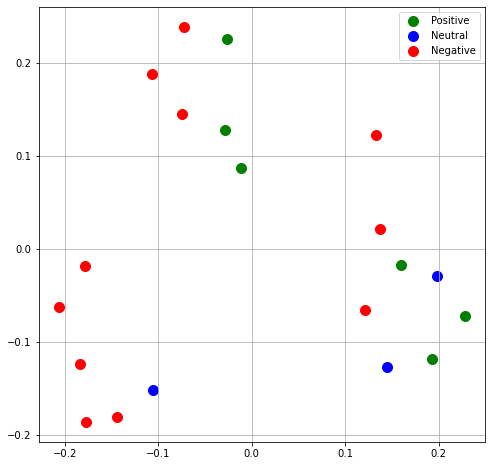

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['Positive', 'Neutral', 'Negative']
colors = ['g', 'b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = df_kw2['main_sentiment'] == target
    ax.scatter(df_kw2.loc[indicesToKeep, 'c1']
               , df_kw2.loc[indicesToKeep, 'c2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

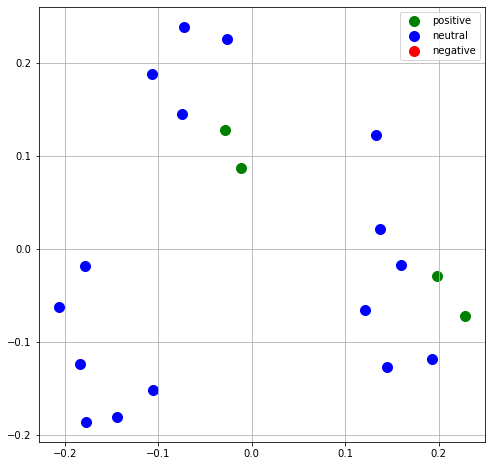

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['positive', 'neutral', 'negative']
colors = ['g', 'b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = df_kw2['max_sentiment'] == target
    ax.scatter(df_kw2.loc[indicesToKeep, 'c1']
               , df_kw2.loc[indicesToKeep, 'c2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()